Histogram and probability plot visualizer:

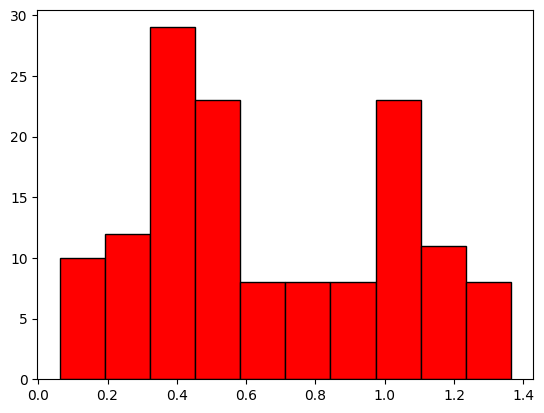

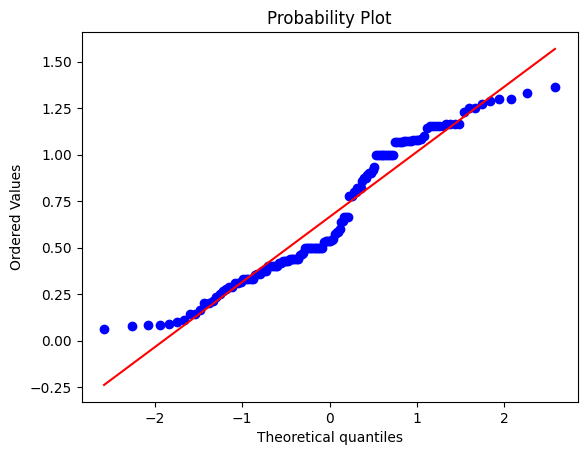

In [1]:
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats

#pulls data into list
column = []
with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        column.append(float(row['aspect_ratio']))

#converts list into histogram
plt.hist(column,10, lw = 1, edgecolor = 'black', color = 'red')
plt.show()

stats.probplot(column,dist="norm",plot=plt)
plt.show()

Code for full statistics for letters:

In [2]:
import csv
import statistics as stats
import pandas as pd

#settings for dataframe display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.expand_frame_repr', False)

#reads data from csv
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data[:80]

sum_stats = []
statistics = ["nr_pix","rows_with_1","cols_with_1","rows_with_3p","cols_with_3p","aspect_ratio",'neigh_1',
              'no_neigh_above','no_neigh_below','no_neigh_left','no_neigh_right','no_neigh_horiz',
              'no_neigh_vert','connected_areas','eyes','longest_vertical_line']

#Iterate through every stat
for stat in statistics:
    #Pull the data for that statistic
    curr_data = read_data(stat)
    mean_row = []
    median_row = []
    stdev_row = []
    #calculate and append the relevant information to each of the rows
    #(mean,median and stdev)
    for i in range(0,len(curr_data),8):
        res = curr_data[i:i+8]
        mean_row.append(stats.mean(res))
        median_row.append(stats.median(res))
        stdev_row.append(stats.stdev(res))

    #append the relevant rows to sum_stats
    sum_stats.append(mean_row)
    sum_stats.append(median_row)
    sum_stats.append(stdev_row)

row_index = []
for stat in statistics:
    row_index.append(stat + ' mean')
    row_index.append(stat + ' median')
    row_index.append(stat + ' stdev')

#Display as dataframe
column_index = ['a','b','c','d','e','f','g','h','i','j']
df = pd.DataFrame(sum_stats, index = row_index, columns = column_index)
print(df)

                                      a          b          c          d          e          f          g          h          i          j
nr_pix mean                   26.500000  32.375000  22.500000  29.625000  33.125000  25.625000  39.250000  27.750000  16.625000  18.750000
nr_pix median                 26.500000  30.000000  22.000000  30.000000  33.000000  25.500000  36.500000  28.000000  11.500000  18.000000
nr_pix stdev                   4.105745   7.366672   4.342481   1.505941   4.882549   1.685018   5.849298   2.549510  11.734412   2.434866
rows_with_1 mean               0.375000   5.375000   7.625000   7.000000   1.125000  11.625000   1.375000   9.000000   8.125000   7.500000
rows_with_1 median             0.000000   7.000000   7.500000   7.000000   1.000000  12.000000   1.000000   9.000000   9.500000   7.500000
rows_with_1 stdev              0.517549   3.377975   0.744024   1.309307   0.834523   0.744024   0.517549   0.925820   5.436320   0.925820
cols_with_1 mean           

Code for full statistics for non-letters:

In [3]:
import csv
import statistics as stats
import pandas as pd

#Display options for the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.expand_frame_repr', False)

#read data from csv
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data[80:140]

sum_stats = []
statistics = ["nr_pix","rows_with_1","cols_with_1","rows_with_3p","cols_with_3p","aspect_ratio",'neigh_1',
              'no_neigh_above','no_neigh_below','no_neigh_left','no_neigh_right','no_neigh_horiz',
              'no_neigh_vert','connected_areas','eyes','longest_vertical_line']
#Iterate through every stat
for stat in statistics:
    #Pull the data for that statistic
    curr_data = read_data(stat)
    mean_row = []
    median_row = []
    stdev_row = []
    #calculate and append the relevant information to each of the rows
    #(mean, median and stdev)
    for i in range(0,len(curr_data),20):
        res = curr_data[i:i+20]
        mean_row.append(stats.mean(res))
        median_row.append(stats.median(res))
        stdev_row.append(stats.stdev(res))

    #append the rows to sum_stats
    sum_stats.append(mean_row)
    sum_stats.append(median_row)
    sum_stats.append(stdev_row)

row_index = []
for stat in statistics:
    row_index.append(stat + ' mean')
    row_index.append(stat + ' median')
    row_index.append(stat + ' stdev')

#Display as dataframe
column_index = ['sad','smiley','xclaim']
df = pd.DataFrame(sum_stats, index = row_index, columns = column_index)
print(df)

                                    sad     smiley     xclaim
nr_pix mean                   31.300000  33.600000  51.250000
nr_pix median                 32.000000  33.500000  50.000000
nr_pix stdev                   2.597570   3.424371  21.474281
rows_with_1 mean               3.350000   3.350000   0.650000
rows_with_1 median             3.500000   3.000000   0.000000
rows_with_1 stdev              1.386969   1.348488   2.476734
cols_with_1 mean               6.950000   5.300000   0.000000
cols_with_1 median             7.000000   5.000000   0.000000
cols_with_1 stdev              1.145931   1.780006   0.000000
rows_with_3p mean              5.700000   6.500000  10.450000
rows_with_3p median            5.500000   6.500000  12.500000
rows_with_3p stdev             0.978721   1.147079   5.443248
cols_with_3p mean              5.500000   5.500000   4.150000
cols_with_3p median            5.500000   5.000000   4.000000
cols_with_3p stdev             0.688247   0.688247   1.424411
aspect_r

Code for summary statistics for both letters and non-letters:

In [4]:
import csv
import statistics as stats
import pandas as pd

#pd display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.expand_frame_repr', False)

#read data from csv
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

sum_stats = []
statistics = ["nr_pix","rows_with_1","cols_with_1","rows_with_3p","cols_with_3p","aspect_ratio",'neigh_1',
              'no_neigh_above','no_neigh_below','no_neigh_left','no_neigh_right','no_neigh_horiz',
              'no_neigh_vert','connected_areas','eyes','longest_vertical_line']

#Iterate through every stat/feature
for stat in statistics:
    #Pull the data for that statistic
    curr_data = read_data(stat)
    curr_data_letter = curr_data[:80]
    curr_data_non_letter = curr_data[80:140]
    #create row to store mean, median and stdev
    mean_row = []
    median_row = []
    stdev_row = []

    #calculte mean, median and stdev and add it to row
    mean_row.append(stats.mean(curr_data_letter))
    mean_row.append(stats.mean(curr_data_non_letter))
    median_row.append(stats.median(curr_data_letter))
    median_row.append(stats.median(curr_data_non_letter))
    stdev_row.append(stats.stdev(curr_data_letter))
    stdev_row.append(stats.stdev(curr_data_non_letter))

    #append row to sum_stats
    sum_stats.append(mean_row)
    sum_stats.append(median_row)
    sum_stats.append(stdev_row)

row_index = []
for stat in statistics:
    row_index.append(stat + ' mean')
    row_index.append(stat + ' median')
    row_index.append(stat + ' stdev')

#print as dataframe
column_index = ['Letter','Non-Letter']
df = pd.DataFrame(sum_stats, index = row_index, columns = column_index)
print(df)

                                 Letter  Non-Letter
nr_pix mean                   27.212500   38.716667
nr_pix median                 28.000000   33.500000
nr_pix stdev                   8.340376   15.336996
rows_with_1 mean               5.912500    2.450000
rows_with_1 median             7.000000    3.000000
rows_with_1 stdev              4.137491    2.197263
cols_with_1 mean               0.962500    4.083333
cols_with_1 median             0.000000    4.500000
cols_with_1 stdev              1.335435    3.222230
rows_with_3p mean              4.162500    7.550000
rows_with_3p median            3.000000    6.000000
rows_with_3p stdev             2.861547    3.828639
cols_with_3p mean              3.725000    5.050000
cols_with_3p median            3.000000    5.000000
cols_with_3p stdev             2.146383    1.170615
aspect_ratio mean              0.536072    0.836295
aspect_ratio median            0.500000    1.066667
aspect_ratio stdev             0.242258    0.410317
neigh_1 mean

Boxplot Visualizer

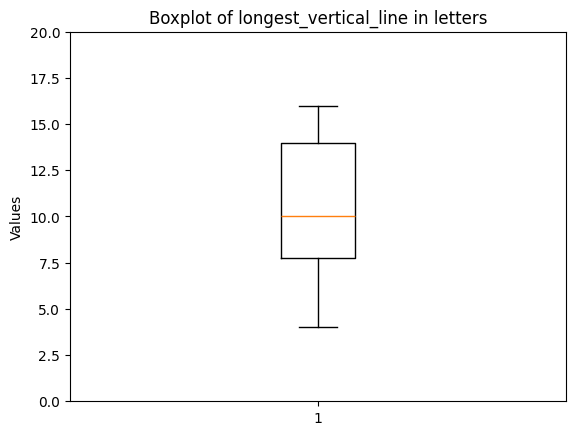

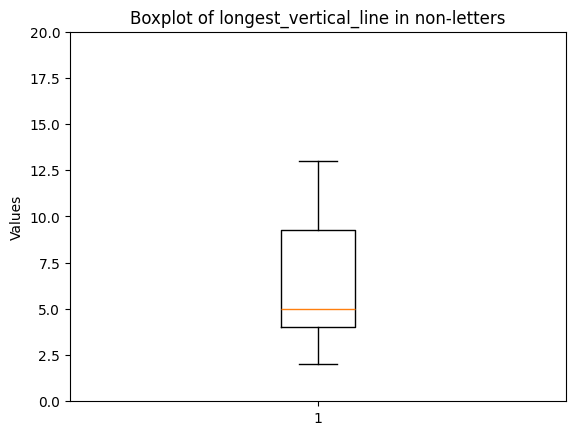

In [5]:
import csv
import matplotlib.pyplot as plt

#read data from csv for feature
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

#split data between letters and non-letters
#Create boxplots for display
curr_data = read_data('longest_vertical_line')
curr_data_letter = curr_data[:80]
curr_data_non_letter = curr_data[80:140]
plt.boxplot(curr_data_letter)
plt.title('Boxplot of longest_vertical_line in letters')
plt.ylabel('Values')
plt.ylim(0,20)
plt.show()
plt.boxplot(curr_data_non_letter)
plt.title('Boxplot of longest_vertical_line in non-letters')
plt.ylabel('Values')
plt.ylim(0,20)
plt.show()

Histogram Maker for Discrimination:

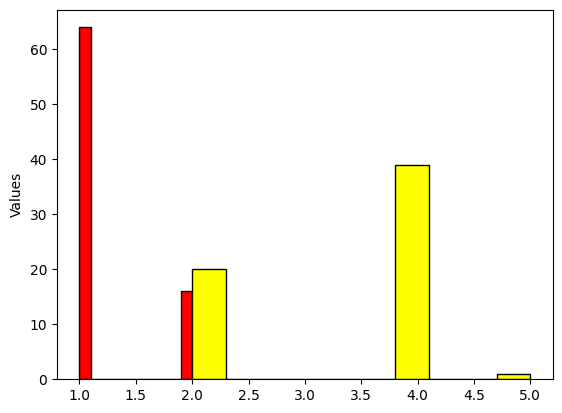

In [6]:
import csv
import matplotlib.pyplot as plt

#reads data from csv (specific feature)
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

#reads data from specific feature
curr_data = read_data('connected_areas')
#split it into two groups (letter and non-letter)
curr_data_letter = curr_data[:80]
curr_data_non_letter = curr_data[80:140]
#creates a histogram comparing the two groups
plt.hist(curr_data_letter, lw =1,edgecolor='black', color ='red')
plt.hist(curr_data_non_letter, lw =1,edgecolor='black', color = 'yellow')
plt.ylabel('Values')
plt.show()

Code for T-Tests:

In [7]:
import scipy.stats as stats
import csv

#pull data from csv for feature
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

#store feature data, split between letters and non-letters
curr_data = read_data('connected_areas')
letters = curr_data[:80]
non_letters = curr_data[80:140]

#use scipy.stats to conduct t-test
#print T-statistic and p-value
t_stat,p_value = stats.ttest_ind(letters,non_letters,equal_var=False)
print ("T statistic = " + str(t_stat))
print ("P value = " + str(p_value))

T statistic = -16.139587754399763
P value = 5.447576969423113e-26


Correlation Pair Assessor:

In [8]:
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats

#Function for reading data from csv
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

features = ["nr_pix","rows_with_1","cols_with_1","rows_with_3p","cols_with_3p","aspect_ratio",'neigh_1',
              'no_neigh_above','no_neigh_below','no_neigh_left','no_neigh_right','no_neigh_horiz',
              'no_neigh_vert','connected_areas','eyes','longest_vertical_line']

corrList = []

#Itereates through, storing the correlation of every pair of features
for i in range(len(features)):
    for x in range(i+1,len(features)):
        feat_1_data = read_data(features[i])
        feat_2_data = read_data(features[x])
        pair_name = features[i] + " and " + features[x]
        corr,p_value = stats.pearsonr(feat_1_data,feat_2_data)
        corrList.append([pair_name,corr,p_value])

#Sorts every correlation by their p-value and then displays them
corrList = sorted(corrList, key=lambda f: f[2])
for row in corrList:
    print(row)

['no_neigh_above and no_neigh_below', np.float64(0.9528765213956123), np.float64(2.300382162991494e-73)]
['no_neigh_left and no_neigh_right', np.float64(0.931993864961067), np.float64(1.10039202543204e-62)]
['nr_pix and rows_with_3p', np.float64(0.8973665773653972), np.float64(7.060913264914925e-51)]
['aspect_ratio and no_neigh_below', np.float64(0.8055762091174943), np.float64(3.578043496461049e-33)]
['cols_with_1 and connected_areas', np.float64(0.8030044417213933), np.float64(8.055198021600345e-33)]
['aspect_ratio and no_neigh_above', np.float64(0.7610469565509674), np.float64(1.0217348967558432e-27)]
['aspect_ratio and longest_vertical_line', np.float64(-0.7575164263220477), np.float64(2.458587179699438e-27)]
['cols_with_1 and neigh_1', np.float64(0.7467727705203195), np.float64(3.251834962435271e-26)]
['no_neigh_below and longest_vertical_line', np.float64(-0.7374828040539765), np.float64(2.737148247705806e-25)]
['no_neigh_below and no_neigh_vert', np.float64(0.7365428823701372), 

Correlation Visualizer:

Correlation is: 0.6974503536478354
p value is: 1.036218653410713e-21


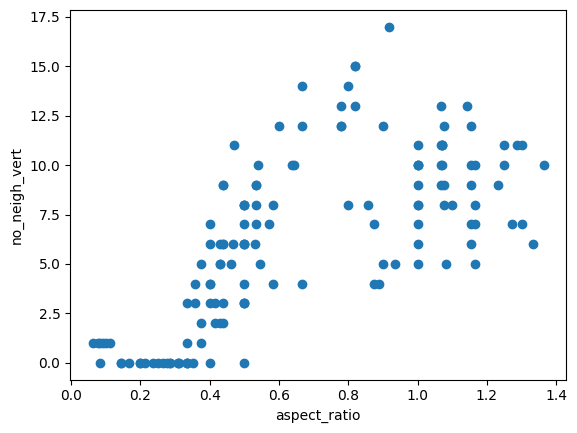

In [9]:
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats

#Reads data from features csv
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

#Creates scatterplot to assess correlation
#To assess the correlation of different features
#Change feature_1 and feature_2
feature_1 = 'aspect_ratio'
var_1_data = read_data(feature_1)
feature_2 = 'no_neigh_vert'
var_2_data = read_data(feature_2)
corr,p_value = stats.pearsonr(var_1_data,var_2_data)
print("Correlation is: " + str(corr))
print("p value is: " + str(p_value))
plt.scatter(var_1_data,var_2_data)
plt.xlabel('aspect_ratio')
plt.ylabel('no_neigh_vert')
plt.show()